# Getting started with plotting PSP data using pyspedas.

Greetings! Below is a guide to plotting plasma moments from the PSP SPAN-I instrument using pySPEDAS, the python implementation of the SPEDAS library originally developed in IDL.

We note that the SPAN-I instrument has many caveats and the data remains preliminary due to ongoing calibration work done by the instrument team. 

For optimal scientific interpretation of noteworthy event, the reader is strongly encouraged to contact a member of the instrument team:<br>
Roberto Livi rlivi@berkeley.edu <br>
Ali Rahmati rahmati@berkeley.edu <br>
Michael McManus mdmcmanus@berkeley.edu <br>
Davin Larson davin@berkeley.edu <br>

This tutorial was brought to you by: <br>
Jaye Verniero jaye.l.verniero@nasa.gov <br>
Kristoff Paulson kristoff.paulson@cfa.harvard.edu <br>
who may serve as points of contact for this tutorial. <br>

The paper describing the SPAN-I instrument in more detail can be found here: <br>https://doi.org/10.3847/1538-4357/ac93f5

First, we install pyspedas using instructions from this link: https://github.com/spedas/pyspedas

Follow all steps under the Installation Section.




In [25]:
#one could alternatively try:
%pip install --upgrade pyspedas

IOStream.flush timed out
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.4 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: pytplot-mpl-temp
    Found existing installation: pytplot-mpl-temp 2.0.10
    Uninstalling pytplot-mpl-temp-2.0.10:
      Successfully uninstalled pytplot-mpl-temp-2.0.10
  Attempting uninstall: pyspedas
    Found existing installation: pyspedas 1.3.18
    Uninstalling pyspedas-1.3.18:
      Successfully uninstalled pyspedas-1.3.18

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade 

In [1]:
import pyspedas
from pytplot import tplot, store_data, get_data ,tlimit,xlim,ylim,tplot_options,options,split_vec
from pyspedas import time_string, time_double

#import math functions 
import numpy as np

In [2]:
#specify time range in the form ['yyyy-mm-dd/hh:mm:ss','yyyy-mm-dd/hh:mm:ss']
trange=['2021-11-22','2021-11-23']

#specify data type to plot
datatype='spi_sf00_l3_mom' #protons
spi_vars = pyspedas.psp.spi(trange=trange, datatype=datatype, level='l3', time_clip=True)


23-Oct-22 20:44:24: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf00_l3_mom/2021/
23-Oct-22 20:44:24: File is current: psp_data/sweap/spi/l3/spi_sf00_l3_mom/2021/psp_swp_spi_sf00_l3_mom_20211122_v04.cdf
23-Oct-22 20:44:25: Time clip was applied to: psp_spi_QUALITY_FLAG
23-Oct-22 20:44:25: Time clip was applied to: psp_spi_DENS
23-Oct-22 20:44:25: Time clip was applied to: psp_spi_VEL_INST
23-Oct-22 20:44:25: Time clip was applied to: psp_spi_VEL_SC
23-Oct-22 20:44:25: Time clip was applied to: psp_spi_VEL_RTN_SUN
23-Oct-22 20:44:25: Time clip was applied to: psp_spi_T_TENSOR_INST
23-Oct-22 20:44:25: Time clip was applied to: psp_spi_TEMP
23-Oct-22 20:44:25: Time clip was applied to: psp_spi_EFLUX_VS_ENERGY
23-Oct-22 20:44:25: Time clip was applied to: psp_spi_EFLUX_VS_THETA
23-Oct-22 20:44:25: Time clip was applied to: psp_spi_EFLUX_VS_PHI
23-Oct-22 20:44:26: Time clip was applied to: psp_spi_SUN_DIST
23-Oct-22 20:44:26: Time clip was applied to: 

In [3]:
#print variable names
print(spi_vars)

['psp_spi_QUALITY_FLAG', 'psp_spi_DENS', 'psp_spi_VEL_INST', 'psp_spi_VEL_SC', 'psp_spi_VEL_RTN_SUN', 'psp_spi_T_TENSOR_INST', 'psp_spi_TEMP', 'psp_spi_EFLUX_VS_ENERGY', 'psp_spi_EFLUX_VS_THETA', 'psp_spi_EFLUX_VS_PHI', 'psp_spi_SUN_DIST', 'psp_spi_VENUS_DIST', 'psp_spi_SC_VEL_RTN_SUN', 'psp_spi_QUAT_SC_TO_RTN', 'psp_spi_MAGF_SC', 'psp_spi_MAGF_INST']


The following is a description of each variable:<br>
QUALITY FLAG - Data quality indicator <br>
DENS - Density (1/cm^3) <br>
VEL_INST - Velocity in SPAN-I instrument coordinates (km/s) <br>
VEL_SC - Spacecraft Velocity (km/s)<br>
VEL_RTN_SUN - Ion Velocity in RTN coordinates (km/s)<br>
TEMP - Ion Temperature (eV)<br>
T_TENSOR_INST - Temperature Tensor SPAN-I instrument coordinates <br>
EFLUX_VS_ENERGY - Proton Differential Energy Flux vs eV <br>
EFLUX_VS_THETA - Proton Differential Energy Flux vs Theta (deflectors) <br>
EFLUX_VS_PHI - Proton Differential Energy Flux vs Phi (anodes) <br>
SUN-DIST - Distance from Sun (km)<br>
VENUS-DIST - Distance from Venus (km)<br>
SC_VEL_RTN- Spacecraft Velocity in RTN coordinates (km/s)<br>
QUAT_SC_TO_RTN - Quaternion rotation of spacecraft in RTN coordinates<br>
MAGF_SC - Magnetic field downsampled to SPAN_I time resolution in spacecraft coordinates (nT)<br>
MAGF_INST - Magnetic field downsampled to SPAN_I time resolution in SPAN-I instrument coordinates (nT)<br>

In [7]:
#Indexing in Python starts at 0

#first variable name in list
print(spi_vars[0])

#fist 4 variable names in list
print(spi_vars[0:3])

QUALITY_FLAG
['QUALITY_FLAG', 'DENS', 'VEL_INST']


Note that pySPEDAS software is still under development. The variables in the cdf file may not have a prefix, while pySPEDAS may assign one. This is currently an issue that will be updated. For flexibilty, we define a prefix for variable names.

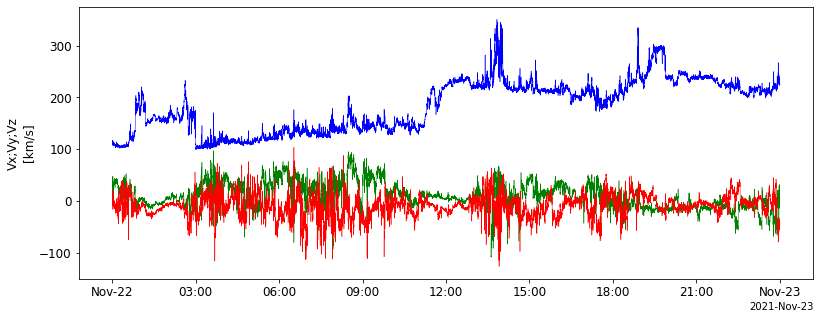

In [4]:
prefix = 'psp_spi_'
#prefix = ''

#plot variable vs time
tplot(prefix+'VEL_RTN_SUN')
#set legend names 
options(prefix+'VEL_RTN_SUN', 'legend_names', ['Vr', 'Vt', 'Vn'])

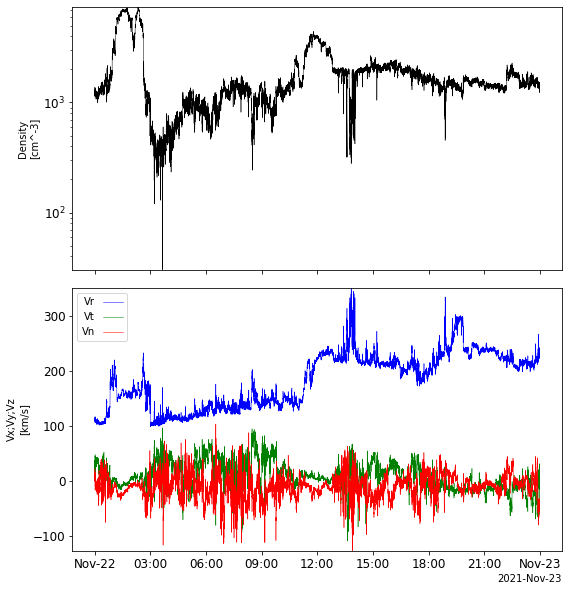

In [10]:
#example plotting multple variables
tplot([prefix+'DENS',prefix+'VEL_RTN_SUN'])


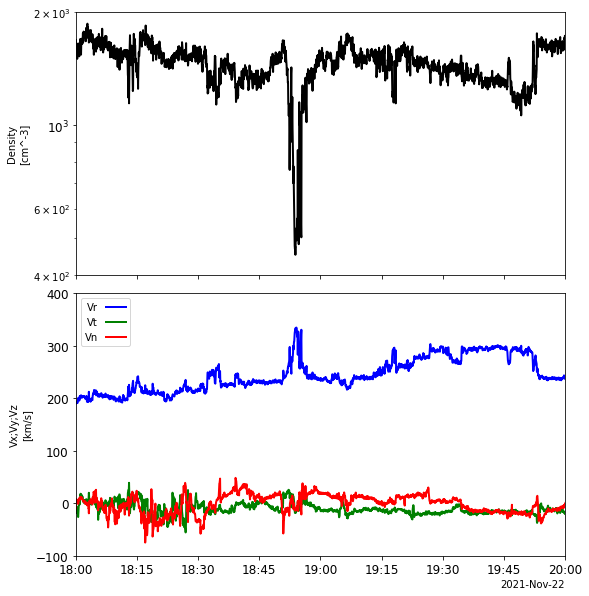

In [22]:
#specify shorter time range in format 'yyyy-mm-dd hh:mm:ss'
start_day=trange[0]
trange1=[start_day+' 18:00:00',start_day+ ' 20:00:00']
#set limits 
xlim(trange1[0],trange1[1])

#replot
tplot([prefix+'DENS',prefix+'VEL_RTN_SUN'])

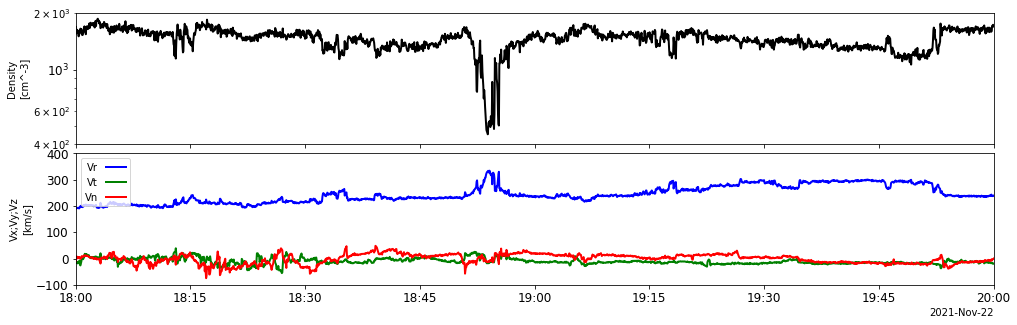

In [23]:
#specify limits on y-axis
ylim(prefix+'DENS',4E2,2E3)
ylim(prefix+'VEL_RTN_SUN',-100,400)

#change line thickness
options([prefix+'DENS',prefix+'VEL_RTN_SUN'],'thick',2)

#change plot size in x and y direction
tplot([prefix+'DENS',prefix+'VEL_RTN_SUN'], xsize=15, ysize=5)

# Investigation 1
The dates of the fourth orbit around the Sun, also known as encounter 4 (E4) were roughly from 2020-01-23 to 2020-02-04. Plot the distance from the sun, velocity in instrument coordinates, and the magnetic field in instrument coordinates for the whole encounter. What trends do you notice? Are there any similarities or differences between the inbound (coming toward the Sun) vs outbound (moving away from the Sun) of the orbit? Play with different time ranges. Add Density and Temperature. Do you notice any patterns between different variables?

In [ ]:
#make cells below by choosing insert --> cell below

# How to make new tplot variables

This section demonstrates how to use the functions 'get_data' and 'store_data' to make new tplot variables.
The 'get_data' function extracts the data from the tplot Variables stored in memory. From there, one can manipilate variables and make new ones. Those new variables are then stored as tplot variables with the 'store_data'command.

In [ ]:
#assign data structure to tplot variable
dens_data=get_data(prefix+'DENS',metadata=True)

#get metadata
dens_data['CDF']['VATT']


In [ ]:
#turn off metadata, (default is set false)
dens_data=get_data(prefix+'DENS')
dens_data

The output states this variable is made of two arrays called "times" and "y." Here is how to access those arrays:

In [ ]:
times=dens_data.times
dens_array = dens_data.y

#check the shape of each array
print(np.shape(times))
print(np.shape(dens_array))

In [ ]:
#Multiply two variables together, such as density and temperature

#define new data structure name for temperature
temp_data = get_data(prefix+'TEMP')

#in tplot variables, the first dimension is always "times", so we do not need to call it again
temp_array = temp_data.y
#note how temperature and density have same number of elements
print(np.shape(temp_array))

#We can multply two arrays with same number of elements together
NT_p = dens_array*temp_array
print(np.shape(NT_p))

In [ ]:
#Define Boltzmann's constant (eV/K)
k = 8.617333262E-5
kNT_p = k*NT_p

#make new tplot variable called 'nT_p' with kNT_p on y axis, and time on x-axis
store_data('nKT_p',data={'x':times,'y':kNT_p})
#plot
tplot('nKT_p')

The magitude of the velocity $|\mathbf{v}|$ is often approximated as fair proxy for the solar wind speed. Here is an example of how to compute $|\mathbf{v}|$ and overplot it with $|\mathbf{v}|=(v_R,v_T,v_N)$

In [ ]:
vel_rtn=get_data(prefix+'VEL_RTN_SUN')
print(vel_rtn)

After printing variable information, we see that there is the "times" array, but this time the "y" array has 3 columns. This means that the "y" array is a matrix that can be accessed using indexing. For example:

In [ ]:
#access time indexed by 100 from of the radial (first) component of v
vr_t100=vel_rtn.y[100,0]
print(vr_t100)

In [ ]:
#define times
vtimes=vel_rtn.times

print(vtimes[100])

#convert from unix time unsing time_string function
print(time_string(vtimes[100]))

#see times entries 90-100
print(time_string(vtimes[89:99]))

In [ ]:
#the ':' symbol accesses everything in first column (time)
#access vr, vt, vn
vr = vel_rtn.y[:,0]
vt = vel_rtn.y[:,1]
vn = vel_rtn.y[:,2]

#check all arrays are same shape
print(vr.shape,vt.shape,vn.shape)


In [ ]:

#define magnitude of velocity vector
vmag=np.sqrt(vr**2 + vt**2 + vn**2) #note '**' symbol is for exponents
print(np.shape(vmag))


#define new tplot variable
store_data('vmag',data={'x':vtimes,'y':vmag})

#plot
tplot('vmag')


In [ ]:
#now combine new |v| variable with original velocity vector
store_data("vel_rtn_mag",data=[prefix+'VEL_RTN_SUN','vmag'])

tplot('vel_rtn_mag')

In [ ]:
#note how one can also plot individual components of a vector using the 'split_vec' function
split_vec(prefix+'VEL_RTN_SUN')
tplot(prefix+'VEL_RTN_SUN_x')

# Investigation 2

How much of the velocity magnitude $|\mathbf{v}|$ is in the radial (R) direction vs the other T and N components? <br>
To estimate, <br>
1. Make a new tplot variable where the data displayed is instead $\left(\frac{v_R}{|\mathbf{v}|},\frac{v_T}{|\mathbf{v}|},\frac{v_N}{|\mathbf{v}|}\right)$ <br>
What do you see? Is a trend noticable from the plots? Play with the time ranges again. <br>
Think about how you would calculate what fraction of the velocity was in the radial direction.

Now we want to compare the velocity to the magnetic field. Let's use the instrument coordinate coordinate system for now. <br>
2. Make a new tplot variable from 'VEL_INST' that displays $\left(\frac{v_x}{|\mathbf{v}|},\frac{v_y}{|\mathbf{v}|},\frac{v_z}{|\mathbf{v}|}\right)$ <br>
3. Make a new tplot variable from 'MAGF_INST' that displays $\left(\frac{b_x}{|\mathbf{b}|},\frac{b_y}{|\mathbf{b}|},\frac{b_z}{|\mathbf{b}|}\right)$ <br>

What do you notice? 
